In [24]:
import os
import tarfile
import urllib
import pandas as pd
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def load_data(filename:str):
    return pd.read_csv(filename+".csv")
concrete = load_data("V7")

In [26]:
concrete.head()

,Unnamed: 0,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,NaN,228.0,0.0,932.0,594.0,270,40.27
3,3,332.5,142.5,NaN,228.0,0.0,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Unnamed** - номера строк, сразу же удалим их

In [27]:
concrete = concrete.drop("Unnamed: 0",axis=1)

In [28]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        496 non-null    float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


Можно заметить, что в категории **fly_ash** встречаются **NotaNumber** значения

In [29]:
concrete.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,496.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,52.169556,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,62.846995,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.200000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


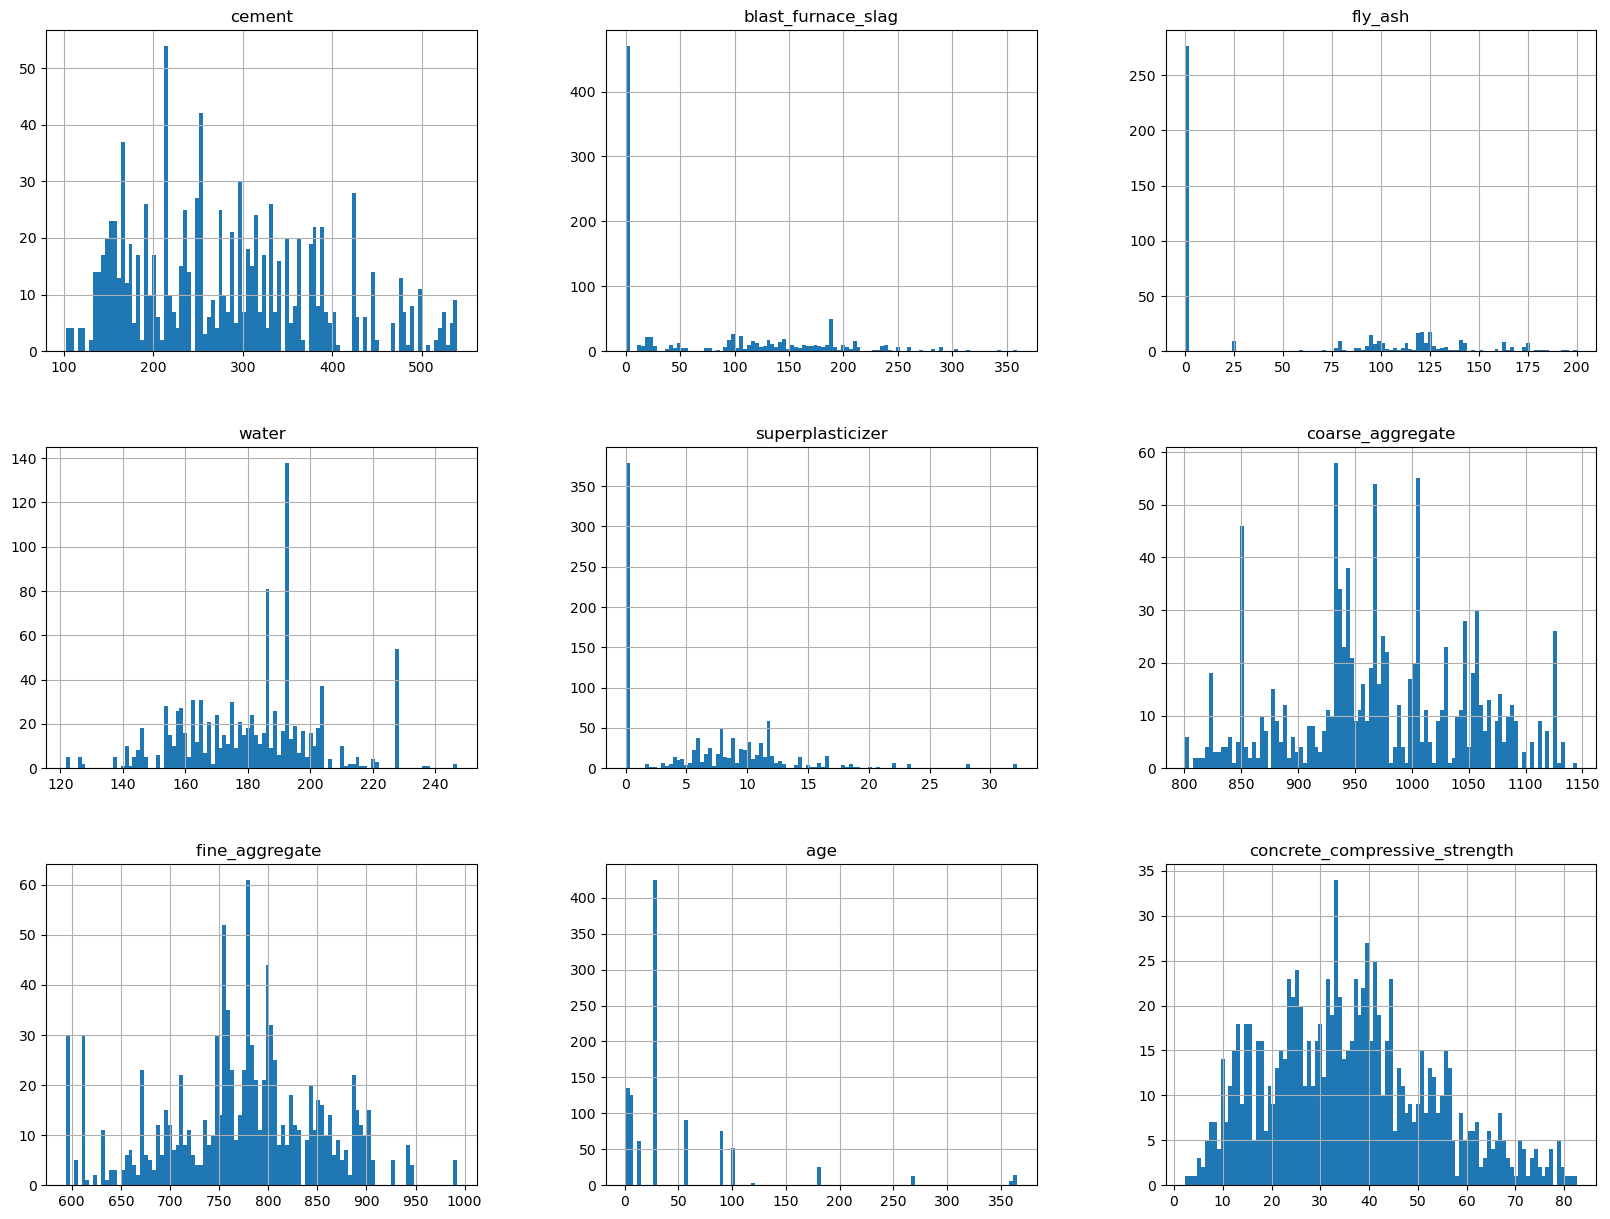

In [30]:
concrete.hist(bins=100,figsize=(20,15))
plt.show()

Это просто **ЖОПА**, а не данные. ~~я просто ибал, особенно ебучи возраст. Сука, отдельные пики с мудаком который кучу бетона в 28 лет записал~~ А ещё "fine_aggregate" это оказывается "fine_aggregate "

In [31]:
corr_matrix  = concrete.corr()
corr_matrix

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.382330,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.329026,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.382330,-0.329026,1.000000,-0.231324,0.349923,0.003061,0.072901,-0.144291,-0.093628
water,-0.081587,0.107252,-0.231324,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.349923,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,0.003061,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.072901,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.144291,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.093628,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [32]:
corr_matrix["concrete_compressive_strength"].sort_values(ascending = False)

concrete_compressive_strength    1.000000
cement                           0.497832
superplasticizer                 0.366079
age                              0.328873
blast_furnace_slag               0.134829
fly_ash                         -0.093628
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
water                           -0.289633
Name: concrete_compressive_strength, dtype: float64

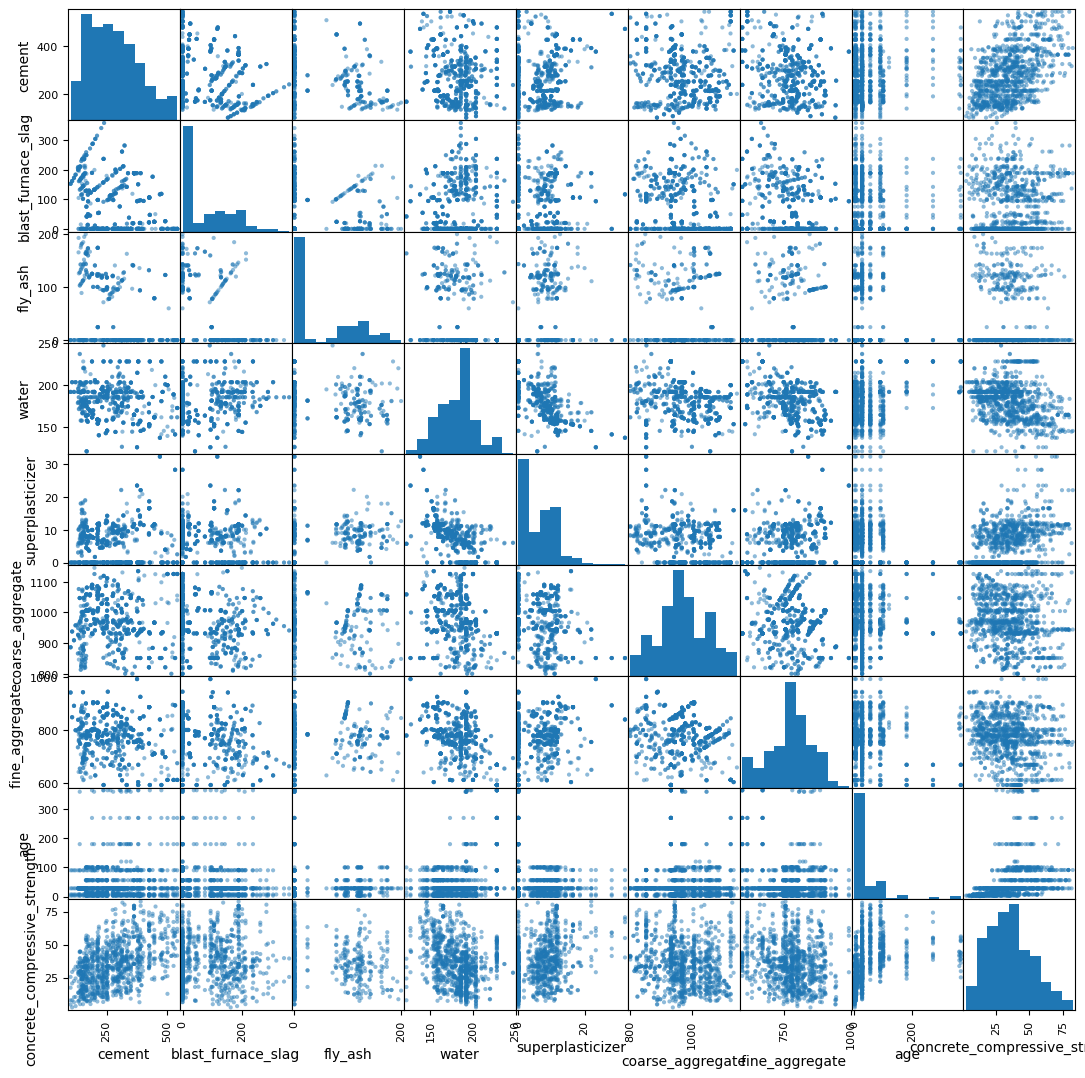

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(concrete,figsize=(13,13))
plt.show()

Чё можно сразу прикинуть **age** может и влияет на возраст на первые 100 лет но хз, данные очень грязные.

Из значимого сразу видно **Cement** и **water** Также в приципе коррелируют, **fly_ash**, **fine/coarse__aggregate**(можно попробовать разделить), **superplasterizer**, **blast_furnace_slag**

Так как это цемент, то важными данными юудут отношения между компонентами

In [34]:
concrete_clean = concrete
concrete_clean["с2w"] = concrete["cement"]/concrete["water"]
concrete_clean["coarse2fine"]=concrete["coarse_aggregate"]/concrete["fine_aggregate "]
concrete_clean["coarse2fine2c"]=concrete["coarse2fine"]/concrete["cement"]
concrete_clean["coarse2c"]=concrete["coarse_aggregate"]/concrete["cement"]
concrete_clean["fine2c"]=concrete["fine_aggregate "]/concrete["cement"]
concrete_clean["s2w"] = concrete["superplasticizer"]/concrete["water"]
concrete_clean["s2c"] = concrete["superplasticizer"]/concrete["cement"]
concrete_clean["bfs2c"] = concrete["blast_furnace_slag"]/concrete["cement"]
concrete_clean.corr()["concrete_compressive_strength"].sort_values(ascending = False,key=abs)

concrete_compressive_strength    1.000000
с2w                              0.559522
cement                           0.497832
coarse2c                        -0.481312
fine2c                          -0.472839
coarse2fine2c                   -0.437780
s2w                              0.378658
superplasticizer                 0.366079
age                              0.328873
water                           -0.289633
fine_aggregate                  -0.167241
coarse_aggregate                -0.164935
blast_furnace_slag               0.134829
s2c                              0.115235
fly_ash                         -0.093628
bfs2c                           -0.069018
coarse2fine                      0.049028
Name: concrete_compressive_strength, dtype: float64

**CEMENT TO WATER** даёт очень неплохую корреляцию, попробую с остальными к воде

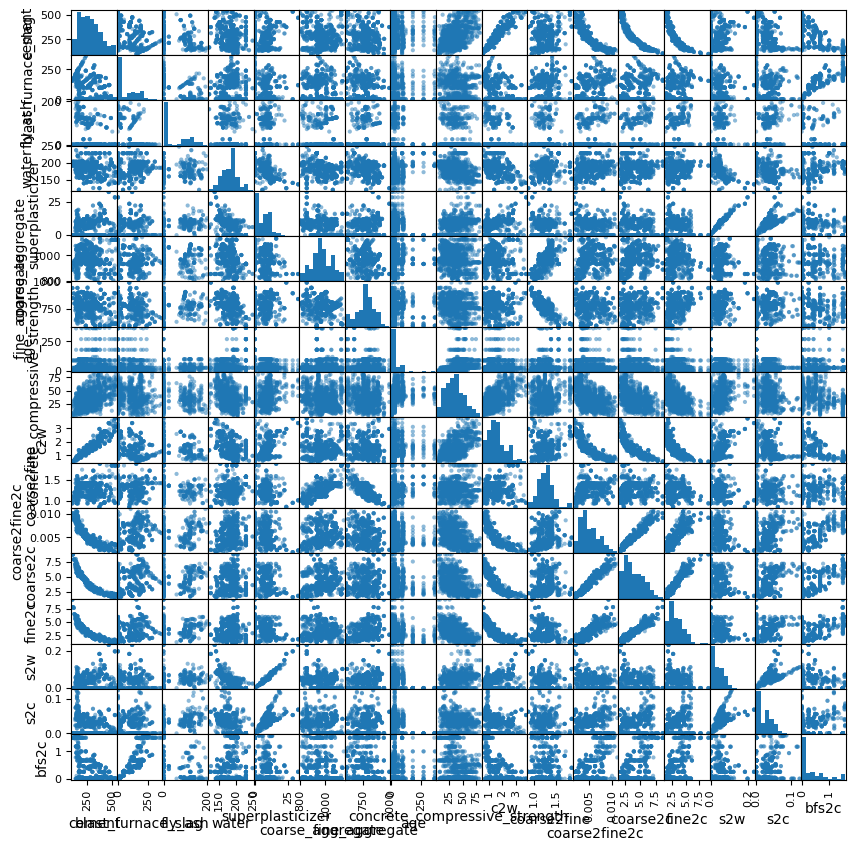

In [35]:
scatter_matrix(concrete_clean,figsize=(10,10))
plt.show()

In [36]:
concrete_clean.drop("fly_ash",axis=1,inplace=True)
#concrete = concrete.drop("fa2c",axis=1)
concrete_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   water                          1030 non-null   float64
 3   superplasticizer               1030 non-null   float64
 4   coarse_aggregate               1030 non-null   float64
 5   fine_aggregate                 1030 non-null   float64
 6   age                            1030 non-null   int64  
 7   concrete_compressive_strength  1030 non-null   float64
 8   с2w                            1030 non-null   float64
 9   coarse2fine                    1030 non-null   float64
 10  coarse2fine2c                  1030 non-null   float64
 11  coarse2c                       1030 non-null   float64
 12  fine2c                         1030 non-null   f

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression
concreteX = concrete_clean.loc[:,concrete.columns != 'concrete_compressive_strength']
concreteY = concrete_clean['concrete_compressive_strength']
bestf=SelectKBest(f_regression,k=5)
fit = bestf.fit(concreteX,concreteY)
dfscores = pd.DataFrame({"fit":fit.scores_})
dfcolumns = pd.DataFrame({"title":concreteX.columns})
fscores = pd.concat([dfcolumns,dfscores],axis=1)
fscores.sort_values(ascending = False,by = "fit")

,title,fit
7,с2w,468.501376
0,cement,338.724341
10,coarse2c,309.952333
11,fine2c,296.019596
9,coarse2fine2c,243.728079
12,s2w,172.068305
3,superplasticizer,159.085765
6,age,124.669830
2,water,94.132923
5,fine_aggregate,29.580130


In [38]:
# Построенный набор данных
delete = ["bfs2c","coarse2fine","s2c","blast_furnace_slag","coarse_aggregate","fine_aggregate "]
concrete_clean.drop(delete,axis=1,inplace=True)
concrete_clean

,cement,water,superplasticizer,age,concrete_compressive_strength,с2w,coarse2fine2c,coarse2c,fine2c,s2w
0,540.0,162.0,2.5,28,79.99,3.333333,0.002849,1.925926,1.251852,0.015432
1,540.0,162.0,2.5,28,61.89,3.333333,0.002890,1.953704,1.251852,0.015432
2,332.5,228.0,0.0,270,40.27,1.458333,0.004719,2.803008,1.786466,0.000000
3,332.5,228.0,0.0,365,41.05,1.458333,0.004719,2.803008,1.786466,0.000000
4,198.6,192.0,0.0,360,44.30,1.034375,0.005968,4.926485,4.156596,0.000000
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,179.6,8.9,28,44.28,1.538976,0.004097,3.147974,2.779667,0.049555
1026,322.2,196.0,10.4,28,31.18,1.643878,0.003121,2.538485,2.524519,0.053061
1027,148.5,192.7,6.1,28,23.70,0.770628,0.007704,6.009428,5.252525,0.031655
1028,159.1,175.6,11.3,28,32.77,0.906036,0.007884,6.219987,4.958517,0.064351


In [39]:
# Исходный набор данных
concrete_full=concrete
concrete_full

,cement,water,superplasticizer,age,concrete_compressive_strength,с2w,coarse2fine2c,coarse2c,fine2c,s2w
0,540.0,162.0,2.5,28,79.99,3.333333,0.002849,1.925926,1.251852,0.015432
1,540.0,162.0,2.5,28,61.89,3.333333,0.002890,1.953704,1.251852,0.015432
2,332.5,228.0,0.0,270,40.27,1.458333,0.004719,2.803008,1.786466,0.000000
3,332.5,228.0,0.0,365,41.05,1.458333,0.004719,2.803008,1.786466,0.000000
4,198.6,192.0,0.0,360,44.30,1.034375,0.005968,4.926485,4.156596,0.000000
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,179.6,8.9,28,44.28,1.538976,0.004097,3.147974,2.779667,0.049555
1026,322.2,196.0,10.4,28,31.18,1.643878,0.003121,2.538485,2.524519,0.053061
1027,148.5,192.7,6.1,28,23.70,0.770628,0.007704,6.009428,5.252525,0.031655
1028,159.1,175.6,11.3,28,32.77,0.906036,0.007884,6.219987,4.958517,0.064351


In [40]:
# Исходный преобразованный набор данных
from sklearn.preprocessing import StandardScaler
concrete_full=concrete
scaler_full = StandardScaler().fit(concrete_full)
std_concrete_full = pd.DataFrame(scaler_full.fit_transform(concrete_full))
std_concrete_full

,0,1,2,3,4,5,6,7,8,9
0,2.477915,-0.916764,-0.620448,-0.279733,2.645408,2.709300,-1.157445,-1.316909,-1.443432,-0.561907
1,2.477915,-0.916764,-0.620448,-0.279733,1.561421,2.709300,-1.137137,-1.299272,-1.443432,-0.561907
2,0.491425,2.175461,-1.039143,3.553066,0.266627,-0.185162,-0.233335,-0.760025,-1.047124,-0.956453
3,0.491425,2.175461,-1.039143,5.057677,0.313340,-0.185162,-0.233335,-0.760025,-1.047124,-0.956453
4,-0.790459,0.488793,-1.039143,4.978487,0.507979,-0.839632,0.383942,0.588233,0.709845,-0.956453
...,...,...,...,...,...,...,...,...,...,...
1025,-0.045645,-0.092171,0.451410,-0.279733,0.506781,-0.060673,-0.540510,-0.540996,-0.310868,0.310489
1026,0.392819,0.676200,0.702626,-0.279733,-0.277762,0.101265,-1.023103,-0.927977,-0.500008,0.400142
1027,-1.270088,0.521589,-0.017528,-0.279733,-0.725729,-1.246781,1.242147,1.275824,1.522253,-0.147131
1028,-1.168610,-0.279579,0.853356,-0.279733,-0.182539,-1.037749,1.331098,1.409515,1.304305,0.688778


In [41]:
# Построенный преобразованный набор данных
scaler_clean = StandardScaler().fit(concrete_clean)
std_concrete_clean = pd.DataFrame(scaler_full.fit_transform(concrete_clean))
std_concrete_clean

,0,1,2,3,4,5,6,7,8,9
0,2.477915,-0.916764,-0.620448,-0.279733,2.645408,2.709300,-1.157445,-1.316909,-1.443432,-0.561907
1,2.477915,-0.916764,-0.620448,-0.279733,1.561421,2.709300,-1.137137,-1.299272,-1.443432,-0.561907
2,0.491425,2.175461,-1.039143,3.553066,0.266627,-0.185162,-0.233335,-0.760025,-1.047124,-0.956453
3,0.491425,2.175461,-1.039143,5.057677,0.313340,-0.185162,-0.233335,-0.760025,-1.047124,-0.956453
4,-0.790459,0.488793,-1.039143,4.978487,0.507979,-0.839632,0.383942,0.588233,0.709845,-0.956453
...,...,...,...,...,...,...,...,...,...,...
1025,-0.045645,-0.092171,0.451410,-0.279733,0.506781,-0.060673,-0.540510,-0.540996,-0.310868,0.310489
1026,0.392819,0.676200,0.702626,-0.279733,-0.277762,0.101265,-1.023103,-0.927977,-0.500008,0.400142
1027,-1.270088,0.521589,-0.017528,-0.279733,-0.725729,-1.246781,1.242147,1.275824,1.522253,-0.147131
1028,-1.168610,-0.279579,0.853356,-0.279733,-0.182539,-1.037749,1.331098,1.409515,1.304305,0.688778


In [42]:
from sklearn.model_selection import train_test_split
def split_data(data):
    data_y = data["concrete_compressive_strength"]
    data_x = data.drop(columns=["concrete_compressive_strength"])
    test_size = 0.2
    val_size = 0.25
    seed = 7
    
    x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size = test_size, random_state = seed)
    
    x_train2, x_val, y_train2, y_val = train_test_split(x_train,y_train,test_size = val_size, random_state = seed)
    
    return x_train,x_test,x_val, y_train,y_test, y_val

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Input

def build_fully_connected_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(64, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1)) 
    model.compile(optimizer='adam', loss='mse')
    return model

def evaluate_model(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

    train_r2 = r2_score(y_train, train_preds)
    val_r2 = r2_score(y_val, val_preds)

    return train_rmse, val_rmse, train_r2, val_r2

def compare_models(data):
    x_train, x_test, x_val, y_train, y_test, y_val = split_data(data)

    x_train_cnn = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_val_cnn = x_val.values.reshape((x_val.shape[0], x_val.shape[1], 1))

    fc_model = build_fully_connected_model(input_shape=(x_train.shape[1],))
    cnn_model = build_cnn_model(input_shape=(x_train_cnn.shape[1], 1))

    fc_train_rmse, fc_val_rmse, fc_train_r2, fc_val_r2 = evaluate_model(fc_model, x_train, y_train, x_val, y_val)

    cnn_train_rmse, cnn_val_rmse, cnn_train_r2, cnn_val_r2 = evaluate_model(cnn_model, x_train_cnn, y_train, x_val_cnn, y_val)

    return {
        'Fully Connected': {
            'Train RMSE': fc_train_rmse,
            'Val RMSE': fc_val_rmse,
            'Train R²': fc_train_r2,
            'Val R²': fc_val_r2,
        },
        'CNN': {
            'Train RMSE': cnn_train_rmse,
            'Val RMSE': cnn_val_rmse,
            'Train R²': cnn_train_r2,
            'Val R²': cnn_val_r2,
        }
    }

In [49]:
datasets = {
    "Concrete Clean": concrete_clean,
    "Standard Concrete Clean": std_concrete_clean,
    "Concrete Full": concrete_full,
    "Standard Concrete Full": std_concrete_full
}
results = {}

for dataset_name, dataset in datasets.items():
    results[dataset_name] = compare_models(dataset)

for dataset_name, metrics in results.items():
    print(f"Results for {dataset_name}:")
    for model_name, scores in metrics.items():
        print(f"  {model_name}:")
        for metric_name, score in scores.items():
            print(f"    {metric_name}: {score:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


KeyError: 'concrete_compressive_strength'